# SLR II

In SLR I we learned about the statistical learning approach to problems, and then saw it in action with the Simple Linear Regression algorithm. In this notebook you'll dive deeper into simple linear regression, this will prepare us to build upon SLR with multiple and polynomial linear regression in the next two notebooks.

## What We'll Accomplish in This Notebook

Specifically we'll cover:
<ul>
    <li>An aside on the difference between explanatory modeling and predictive modeling.</li> 
    <li>SLR assumptions and how to check them including:</li>
        <ul>
            <li>The relationship between $X$ and $y$ is linear,</li> 
            <li>The variance of the errors, $\epsilon_i$, are the same for all $i$,</li> 
            <li>The errors are normally distributed,</li> 
            <li>Each observation is independent of all other observations.</li> 
        </ul>
    <li>Pearson's correlation coefficient.</li> 
    <li>Touching on $p$-values and hypothesis testing for the coefficient, $\beta_1$.</li> 
    <li>Touching on confidence intervals for $\beta_1$ and our line.</li> 
</ul>

Let's get started!

In [1]:
# import the packages we'll use

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Data Science Aside - Explanatory vs. Predictive Modeling

Now many of you have probably taken a course or two in statistics, and at least some of you have probably learned simple linear regression in that setting.

But the whole concept of train test split we introduced in SLR I probably seemed a bit foreign to anyone that's seen SLR before. 

#### What's the Reason for the Difference?

In a traditional stats class you're learning about explanatory statistical models, whereas in this course we're primarily focusing on predictive modeling. These two fields can use the same tools, but have somewhat different goals.

##### Explanatory Modeling

The goal here is to build models that explain the data we've observed the best that we can. This is really important in scientific research where we're trying to provide explanations as to why the world is the way it is. In explanatory modeling you'll often see things like hypothesis tests, $p$-values, and confidence intervals when we examine how "good" a model is, or how <i>statistically significant</i> the results are.

##### Predictive Modeling

The goal here is to build models that predict really good. As we mentioned before in SLR I you can build a model that explains the data really well, but that model is not then guaranteed to also have good predictive power. We haven't touched on how we can improve our model's predictive power, but in the multiple linear regression notebook we'll introduce the technique of <i>cross validation</i>. In many predictive modeling settings you're willing to accept a model that might not best explain the data, as long as it provides superior predictions.

#### Frenemies?

As you can see these two approaches don't always align, and as with any binary choice there are people on both sides of the aisle that passionately disagree with the other side. However, the two really coexist and which approach is best depends upon the problem at hand. If the comparison between the two is interesting to you, check out this paper <a href="https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf">https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf</a> by Galit Shmueli who was at the University of Maryland at the time.

### Moving Forward

One of the great things about being a data scientist (in my opinion) is that you get the opportunity to do both, but that means you have to know both (not always! it is becoming more and more common that people are hired to do specific roles). For about $90\%$ of this course we'll approach things from a predictive modeling point of view. However, because linear regression is such a fundamental technique we will cover it from the explanatory modeling point of view as well.

## Data Science Aside Over

## Break Time!

Let's take a 1 to 2 minute break for questions.

<br>
<br>
<br>
<br>
<br>
<br>

## Break Time Over!

In this notebook we will look at things from an explanatory modeling approach, to do this we'll examine how the model explains the training data from SLR I. Note, this is why we put in random seeds!

## SLR Modeling Assumptions

With any statistical model you make a number of assumptions, this is what allows you to develop some algorithm to estimate the model. We'll now go over the three key assumptions in SLR, then show you how you can check them. We'll use our baseball data to demonstrate

In [2]:
# Import the data
baseball = pd.read_csv("baseball_run_diff.csv")

# Train test split
baseball_copy = baseball.copy()
baseball_train = baseball_copy.sample(frac = .75, random_state = 440)

### Assumption 1 - A Linear Relationship

There exists a linear relationship between $y$ and $X$. This one is pretty straightforward. If we are going to model $y$ as a linear function of $X$ then we better think that one actually exists.

#### How to Check

##### Make a plot

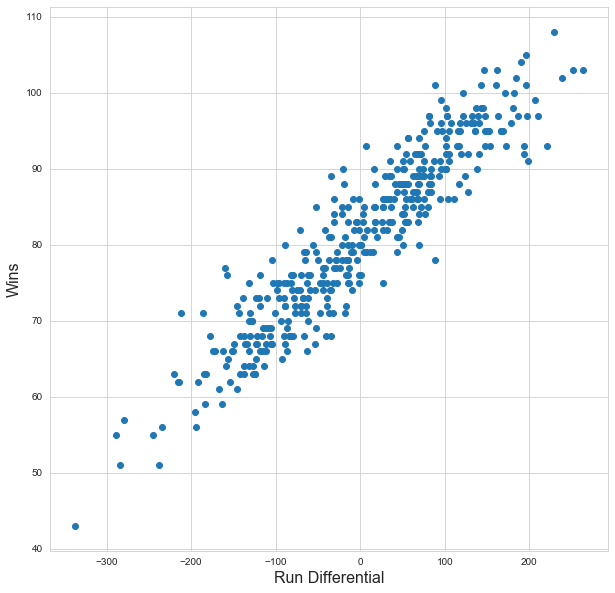

In [3]:
# We'll use plt.scatter for this

# first make a figure
# this makes a figure that is 10 units by 10 units
plt.figure(figsize = (10,10))

# plt.scatter plots RD on the x and W on the y
plt.scatter(baseball_train.RD, baseball_train.W)

# Always good practice to label well when
# presenting a figure to others
# place an xlabel
plt.xlabel("Run Differential", fontsize =16)

# place a ylabel
plt.ylabel("Wins", fontsize = 16)

# type this to show the plot
plt.show()

or

##### Look at the Pearson Correlation, $\rho$

This is a statistical measure of the <i>strength of the linear relationship</i> between $y$ and $X$. Here's the formula:
$$
\rho = \frac{Cov(y,X)}{\sigma_X \sigma_y}
$$

You can approximate $\rho$ with the sample covariance and sample standard deviations, the approximation is $r$.

In [4]:
# Let's calculate it here

# pandas has a nice corr() function
baseball_train[['W','RD']].corr()

,W,RD
W,1.000000,0.933352
RD,0.933352,1.000000


In general, the Pearson Correlation is bounded between $-1$ and $1$ with more positive values indicating a strong positive linear relationship, and more negative values indicating a strong negative linear relationship. Our correlation of $0.933$ here indicates that wins and run differential have a strong positive linear relationship.

For those looking for more statistical rigor, check out this page, <a href="https://online.stat.psu.edu/stat501/lesson/1/1.9">https://online.stat.psu.edu/stat501/lesson/1/1.9</a> to see how you can actually perform a hypothesis test on whether or not there is statistically significant evidence that $\rho \neq 0$.

Note that getting a $\rho$ close to $0$ does NOT mean there is no relationship, just no linear relationship. For example:



In [5]:
# make an x and y
x = np.linspace(-2,2,1000)

# y = x^2
y = np.power(x,2)

# what is the correlation rounded to 10 decimal places?
print("The Pearson correlation between x and y is",np.round(np.corrcoef(x,y)[0,1],10))

The Pearson correlation between x and y is -0.0


## Question Break!


<br>
<br>
<br>
<br>

## Break Over!

### Assumption 2 - All Observations are Independent

We also assume that each observation in the data set is independent from all other observations.

#### How to Check

This is slightly harder to check then assessing a linear fit. But there are some ways to test.

##### Thinking About How the Data Was Collected

This approach helps if you know something about the data collection process. For example, if you wanted to know something about OSU undergrads and you randomly sampled people from a list in the registrars office that would produce independent observations. But if you randomly sampled people from a single Calculus Class and a single Art History Class then your observations are likely dependent.

In our baseball example, we do have reason for concern. The data is produced from year after year observations of the same teams. We did sample our data randomly, but its possible that there is time dependence or team depence. Which takes us to the next way to check.

##### Making more plots

Plot your residuals (this is what we call the difference between the predicted values and the actual values, $w_i - \hat{w_i}$) against your feature and other variables of concern. Then you examine the plots to see if there is an obvious relationship. Let's do that below.

In [6]:
# for prediction
from sklearn.linear_model import LinearRegression

In [7]:
# make the model object
reg = LinearRegression(copy_X = True)

# fit the model
reg.fit(baseball_train.RD.values.reshape(-1,1),baseball_train.W.values.ravel())

# predict
pred = reg.predict(baseball_train.RD.values.reshape(-1,1))

# Now get the residuals
res = baseball_train.W.values.ravel() - pred

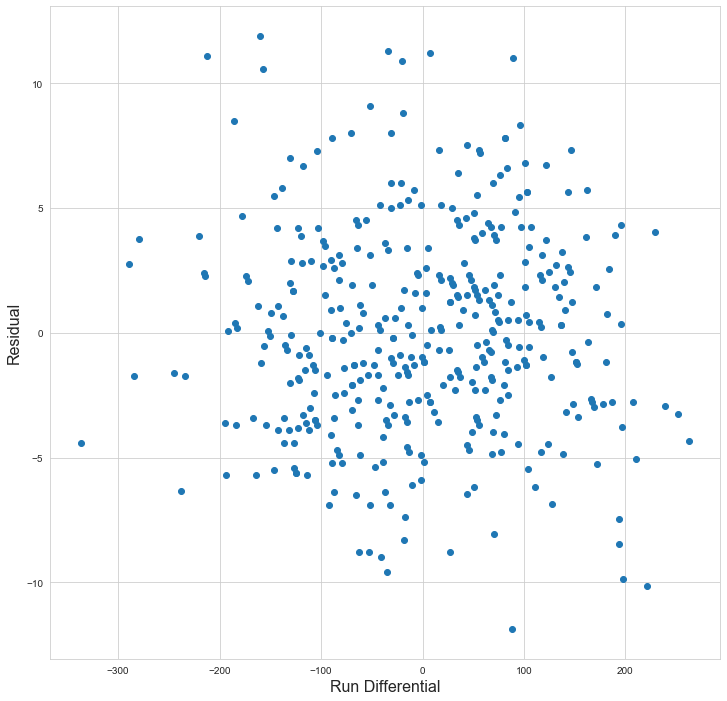

In [8]:
## First plot of rd vs residual

plt.figure(figsize = (12,12))

plt.scatter(baseball_train.RD,res)

plt.xlabel("Run Differential", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

plt.show()

Looking at the plot of run differential vs residual it seems that the two have no obvious relationship, which is a good sign for our inderpendence assumption. Let's move on to residual vs year.

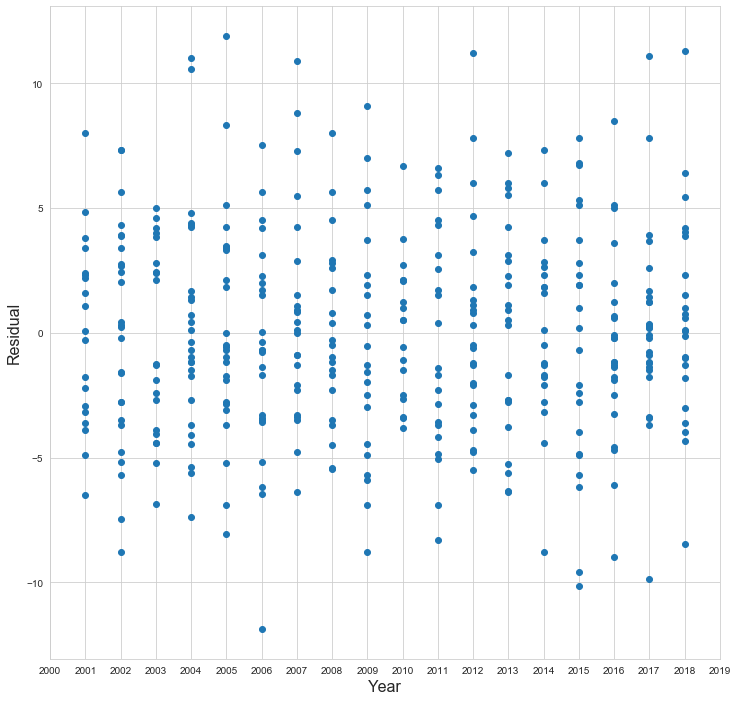

In [9]:
## plot year vs residual

plt.figure(figsize = (12,12))

plt.scatter(baseball_train.yearID,res)

plt.xlabel("Year", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)

# Note this allows you to set specific tick mark values
plt.xticks(range(2000,2020))

plt.show()

Another blob with no obvious pattern, excellent! This is more good news for us in terms of the independence assumption. Let's now look at residuals vs team.

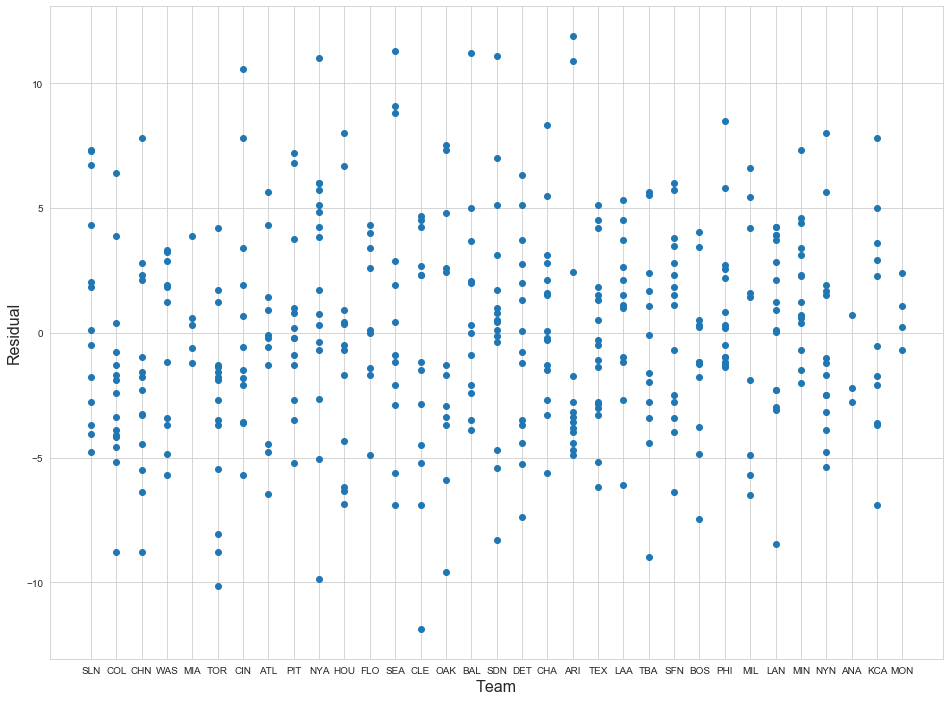

In [10]:
## plot team vs residual

plt.figure(figsize = (16,12))

plt.scatter(baseball_train.teamID,res)

plt.xlabel("Team", fontsize = 16)
plt.ylabel("Residual", fontsize = 16)


plt.show()

This one is a little worrying. Some teams seem to have their wins consistently overestimated (a negative residual) like ARIzona, while others are more likely to be underestimated (a positive residual) like MINnesota. So there is reason to believe that residuals are not independent over team. There are ways to handle this, but they fall out of the scope of this notebook. For this data our violation doesn't seem too egregious so we'll soldier on. 

### Assumption 3 - The Residuals are Normally Distributed with Mean 0 and Equal Variance

The final assumption is on the distribution of the residuals. We say that $\epsilon_i \sim N(0,\sigma^2)$ for all $i$. The assumption on variance is called the homoscedasticity assumption.

#### How to Check Normality

##### Make More Plots!

We can make a histogram of the residuals to check for a bell curve.

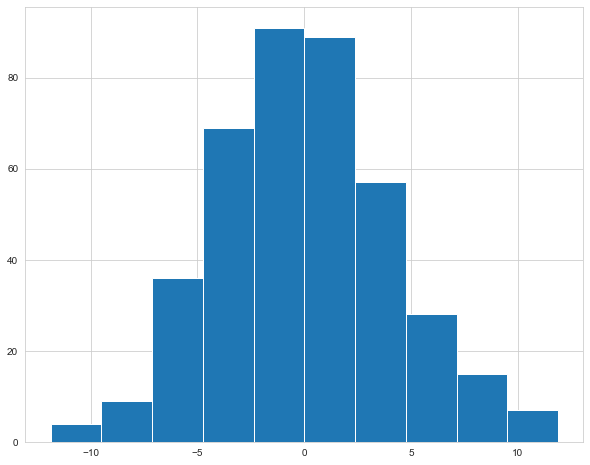

In [11]:
plt.figure(figsize = (10,8))

plt.hist(res)

plt.show()

That certainly looks centered around zero and like a bell curve! But histograms are tough because there are non-normal distributions that look close to the bell curve, for example the Cauchy distribution, <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">https://en.wikipedia.org/wiki/Cauchy_distribution</a>.

So the standard plot you'll see is a quantile-quantile plot, or Q-Q plot. This matches the quantiles of the data with the quantiles of a normal distribution and plots them against eachother. If the residuals are normally distributed, these should fall on a straight line.

In [12]:
# This package allows us to make a q-q plot
import statsmodels.api as sm 

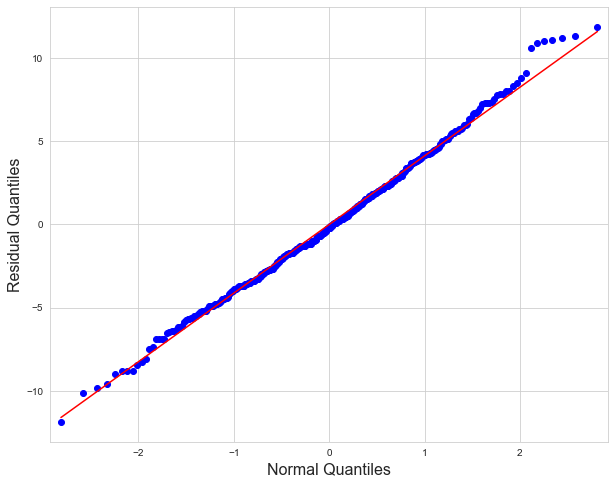

In [13]:
fig,ax = plt.subplots(figsize=(10,8))

# qqplot makes the qqplot
# put in the data you want to plot
# line = 's' plots a line fit to our data
# ax=ax allows us to put the data on the plt subplot object I made
sm.qqplot(res,line='s',ax=ax) 

# Normals go on the x-axis
plt.xlabel("Normal Quantiles", fontsize=16)

# Residuals on the y-axis
plt.ylabel("Residual Quantiles", fontsize=16)


plt.show() 

This looks good! There's typically some slight bowing of the dots near the tails of the normal distribution. We should feel okay with our assumption that the baseball residuals are normally distributed.

#### How to Check Homoscedasticity?

##### Even More Plots!

Now we plot the predicted values vs the residuals. If the residuals have equal variance you should expect to see most of the points fall in a band around $0$. We DON'T want to see the points opening up into a funnel shape or closing into a funnel shape.

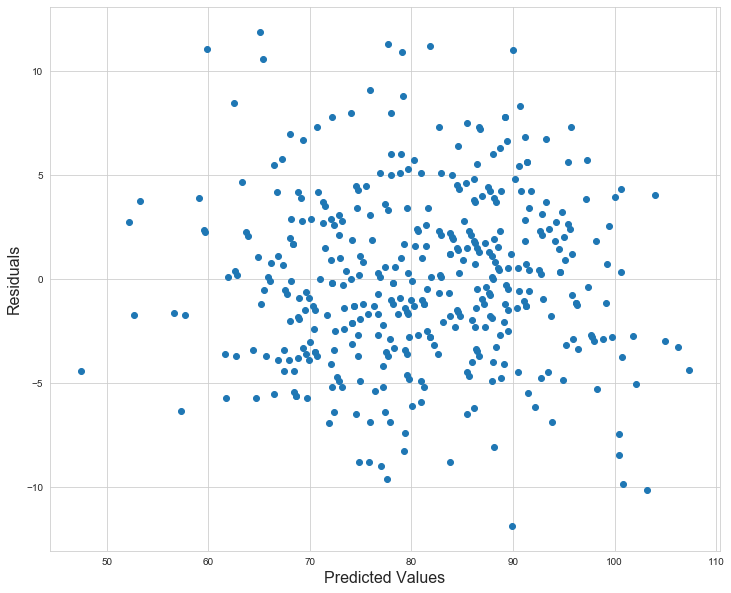

In [14]:
plt.figure(figsize=(12,10))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)

plt.show()

Again this looks good to me! The residuals mostly fall between $10$ and $-10$ and I don't see anything that could be construed as a funnel! Looks like we have homoscedasticity.

## Practice

Return to the model you made for the `carseats` data. Go through and check all of the linear regression assumptions.

In [16]:
### Code Here

## Bring in the model from SLR 1
# get the data
carseats = pd.read_csv("carseats.csv")
carseats_copy = carseats.copy()

carseats_train = carseats_copy.sample(frac = .75, random_state = 5309)

# fit a regression
reg = LinearRegression(copy_X = True)
reg.fit(carseats_train.Price.values.reshape(-1,1),
           carseats_train.Sales.values.ravel())

# make the residuals
y_train = carseats_train.Sales.values.ravel()
pred = reg.predict(carseats_train.Price.values.reshape(-1,1))
res = y_train - pred 

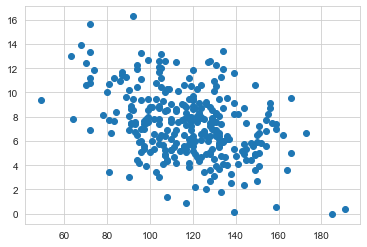

,Price,Sales
Price,1.000000,-0.393795
Sales,-0.393795,1.000000


In [17]:
### Code Here

## Check linearity

plt.scatter(carseats_train.Price,
               carseats_train.Sales)

plt.show()


carseats_train[['Price','Sales']].corr()










There appears to be a slight negative linear relationship. Although not nearly as strong as with the baseball data.

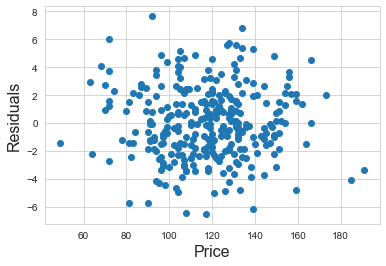

In [18]:
### Code Here

# independence
plt.scatter(carseats_train.Price.values, res)

plt.xlabel("Price",fontsize=16)
plt.ylabel("Residuals",fontsize=16)

plt.show()









No obvious patterns, the residuals seem independent over Price.

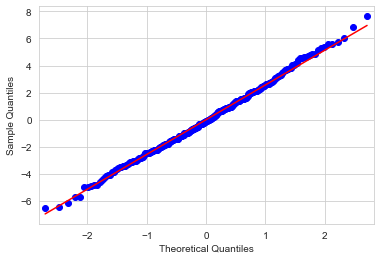

In [20]:
### Code Here

## normality

sm.qqplot(res,line='s')



plt.show()






Looks normal!

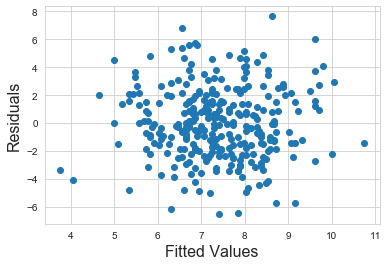

In [22]:
### Code Here
## Homoscedaticity

plt.scatter(pred,res)

plt.xlabel("Fitted Values",fontsize=16)
plt.ylabel("Residuals",fontsize=16)

plt.show()










Looking good to me!

## Assessing the Statistical Significance of the Model

So far we've fit a model, interpreted the fit, and examined whether or not our modeling assumptions fit.

For the baseball data we're fairly confident that our assumptions are okay. So the next thing we can do from an explanatory modeling point of view is to assess the model fit. In SLR I we took that as looking at the loss function, the MSE. But we can also look at other measures of model goodness.

### $p$-value For $\beta_1$

One such goodness measure it to conduct a hypothesis test of whether or not there actually is a linear relationship between $y$ and $X$. In the view of SLR this means performing the following hypothesis test:
$$
\text{H}_0: \beta_1 = 0 \text{ vs. }
$$
$$
\text{H}_1: \beta_1 \neq 0
$$
One way we can perform this test is to use the `statsmodel` package again.

We'll fit the regression in `statsmodel` then examine the model's summary

In [23]:
# Cast the data as np.arrays
# reshape(-1,1) makes it a column vector
y = np.array(baseball_train.W.values.reshape(-1,1))
rd = np.array(baseball_train.RD.values.reshape(-1,1))

# We need to add a column of ones in order to allow for
# a constant
X = np.concatenate([np.ones(np.shape(rd)),rd],axis=1)


# Fit a simple linear regression model
# sm.OLS stands for Ordinary Least Squares, this
# is the name for the method used to get the coefficients
# First put y, then X
slr = sm.OLS(y, X)

# Now fit the model
fit = slr.fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2725.
Date:                Tue, 05 May 2020   Prob (F-statistic):          2.06e-181
Time:                        19:23:48   Log-Likelihood:                -1148.7
No. Observations:                 405   AIC:                             2301.
Df Residuals:                     403   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.0868      0.206    394.479      0.0

Now let's examine the table.
<img src="SLR_table_p_value.png" style="width:80%;"></img>
The row with `x1` corresponds to what we called $\beta_1$. We can see in the `coef` column the same estimate we calculated in SLR I, $0.0999$. If you move over to the `P>|t|` column, this is the $p$-value for the hypothesis test we are interested in, for this particular data our $p$-value is smaller than $0.0005$ which means that the probability of observing what we observed under the null hypothesis is very very small. This means we would reject the null hypothesis in favor of H$_1$. In non-statistical lingo, we have good reason to believe that there is a linear relationship between run differential and wins.

## Question Break

Okay let's take a quick question break for any pressing questions.

<br>
<br>
<br>
<br>
<br>

## Break Over

### Confidence Interval for $\beta_1$

We can also construct a $95\%$ confidence interval for $\beta_1$. Recall from our Probability Theory and Statistics Cheat Sheet that this can be found by taking $\hat{\beta_1} \pm p_{\hat{\beta_1},.95} se(\hat{\beta_1})$, under the assumptions of SLR the probability multiplier, $p_{\hat{\beta_1},.95}$ follows a studentized $t$ distribution with $n - 2$ degrees of freedom.

We can go through the trouble of calculating this by hand, or we can rely on our prior `statsmodel` table
<img src="SLR_table_CI.png" style="width:80%;"></img>
So for the $\beta_1$ from the baseball data our $95\%$ confidence interval is $(0.096,0.104)$.


## Question Break

Let's take a quick one minute question break, before going to a breakout session.

<br>
<br>
<br>
<br>
<br>

## Break Over

### Practice

Go through and perform the hypothesis test for $\beta_1$ from the `carseats` data. Also construct a $95\%$ confidence interval for $\beta_1$.

In [25]:
### Code Here

# Cast the data as np.arrays
# reshape(-1,1) makes it a column vector
y = np.array(carseats_train.Sales.values.reshape(-1,1))
price = np.array(carseats_train.Price.values.reshape(-1,1))

# We need to add a column of ones in order to allow for
# a constant
X = np.concatenate([np.ones(np.shape(price)),price],axis=1)


# Fit a simple linear regression model
# sm.OLS stands for Ordinary Least Squares, this
# is the name for the method used to get the coefficients
# First put y, then X
slr = sm.OLS(y, X)

# Now fit the model
fit = slr.fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())









                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     54.69
Date:                Tue, 05 May 2020   Prob (F-statistic):           1.44e-12
Time:                        19:24:46   Log-Likelihood:                -708.29
No. Observations:                 300   AIC:                             1421.
Df Residuals:                     298   BIC:                             1428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1518      0.796     16.527      0.0

The $p$-value is less than $0.000$. There is significant statistical evidence to reject the null hypothesis at the $\alpha = 0.05$ confidence level. This suggests that there is a linear relationship between Price and Sales.

We estimate a $95\%$ confidence interval for $\beta_1$ to be $(-0.062,-0.036)$.









In [ ]:
### Code Here











### Confidence Interval for the Regression Line

We'll end this notebook with a discussion on how we can provide some understanding on the uncertainty surrounding our regression line.

<b>Warning:</b> We will be delving into a little bit of probability theory here! 

Let's take a look back at the model we're fitting:
$$
y = f(X) + \epsilon = \beta_0 + \beta_1X + \epsilon,
$$
where $\epsilon$ is a vector of independent $\epsilon_i \sim N(0,\sigma^2)$ for all $i$.

<br>
<br>

Now take the expectation on both sides:
$$
E(y) = E(\beta_0 + \beta_1X + \epsilon) = \beta_0 + \beta_1E(X) + E(\epsilon) = \beta_0 + \beta_1E(X),
$$
this is where we got the formula for $\hat{\beta_0}$. 

<br>
<br>

Now let's say we know the value of $X$ for example $X^*$, in probability terms we're now looking at $y$ conditional on $X=X^*$ (denoted $y|X=X^*$), and then take the expectation:
$$
E(y|X=X^*) =  \beta_0 + \beta_1E(X^*) = \beta_0 + \beta_1 X^*,
$$
because we are looking at a specific value of $X$ so it is no longer random. 

<br>

So the regression line we've been plotting is actually a series of point estimates for the mean value of $y$ given a specific value of $X$. We've been denoting these point estimates as $\hat{y}$. 

Just like we gave a confidence interval for $\beta_1$ using our point estimate $\hat{\beta_1}$ we can give a confidence interval for $y|X$ using our point estimate $\hat{y}$. The formula for the confidence interval for $E(y|X=X^*)$ is:
$$
\hat{y} \pm t_{n-2,(1-\alpha/2)}\sqrt{\frac{\sum_{i=1}^n\left(y_i - \hat{y_i}\right)^2}{n-2}}\sqrt{\frac{1}{n} + \frac{\left(X^* - \overline{X}\right)^2}{(n-1)s_X^2}},
$$
where $n$ is the number of observations and $t_{n-2,(1-\alpha/2)}$ is such that $P(T\geq t_{n-2,(1-\alpha/2)}) = \alpha/2$ for a random variable $T$ with a Studentized $t$ distribution with $n-2$ degrees of freedom. This formula still follows the confidence interval pattern, where here the product of the square roots is the standard error of $E(y|X=X^*)$.

## Questions

Let's take one or two questions then we'll write some code to get a confidence interval.

<br>
<br>
<br>
<br>

## Question Time Over

Let's see how we can implement this with code!

Unfortunately there is no easy built in confidence interval code, so we'll make a function by hand.

In [26]:
# First run this chunk to make sure we have 
# the model and residuals from earlier
# make the model object
reg = LinearRegression(copy_X = True)

# fit the model
reg.fit(baseball_train.RD.values.reshape(-1,1),baseball_train.W.values.ravel())

# predict
pred = reg.predict(baseball_train.RD.values.reshape(-1,1))

# Now get the residuals
res = baseball_train.W.values.ravel() - pred

In [27]:
# The scipy package allows you to get the t stat we need
from scipy.stats import t

# We'll write a function that takes in X, X_star, alpha,
# and the residuals and produces a confidence interval around yhat
def get_ci(X, X_star, res, alpha):
    # Get n
    n = len(res)

    # The first square root we'll denote root_1
    # remember our residuals were stored in res
    root_1 = np.sqrt(np.sum(np.power(res,2))/(n-2))
    
    # This is the second square root, we'll call it root_2
    root_2 = np.sqrt((1/n) + np.power((X_star-np.mean(X)),2)/((n-1)*np.var(X)))
    
    # get t_stat
    # this is done using t.ppf 1-alpha goes first then the df
    t_stat = t.ppf(1-alpha/2, n-2)
    
    # Now we calculate y_hat
    y_hat = reg.predict(np.array(X_star).reshape(-1,1))
    
    # Now put it all together
    lb = y_hat - t_stat*root_1*root_2
    ub = y_hat + t_stat*root_1*root_2
    
    return lb,ub

In [28]:
# First we can look at the ci for one value of X*
# Let's say a team with 40 rd
lb,ub = get_ci(baseball_train.RD.values,40,res,0.05)

print("A 95% confidence interval for the average wins of a team with 40 rd is",
         lb[0],ub[0])

A 95% confidence interval for the average wins of a team with 40 rd is 84.64893978494182 85.51307370182666


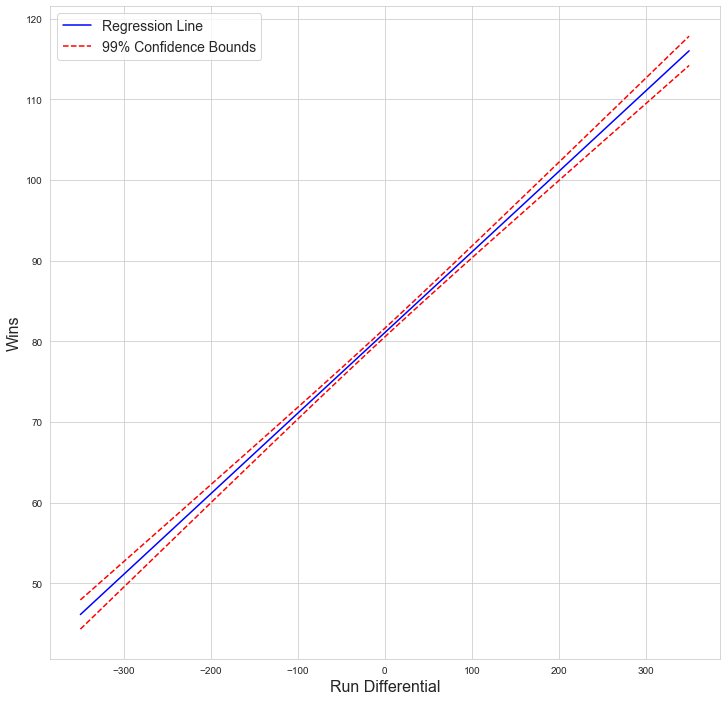

In [29]:
# We can even plot the confidence bounds around our regression line
# Let's try a 99% confidence interval this time

# Make the figure
plt.figure(figsize = (12,12))

# We want a wide array of rd values
xs = np.linspace(-350,350,700)

# Plot the regression line
plt.plot(xs, reg.predict(xs.reshape(-1,1)), 'b', label="Regression Line")

# Now we get the confidence bounds
lbs,ubs = get_ci(baseball_train.RD.values,xs,res,0.01)

# Plot the bounds
plt.plot(xs, lbs, 'r--', label="99% Confidence Bounds")
plt.plot(xs, ubs, 'r--')

# Add labels
plt.xlabel("Run Differential", fontsize=16)
plt.ylabel("Wins", fontsize=16)

# add a legend
plt.legend(fontsize=14)

plt.show()

Awesome. Now I'll answer one or two questions, then it's your turn!

## Questions

<br>
<br>
<br>
<br>
<br>

## End Questions

### Practice

Make a function that takes in a confidence level, $(1-\alpha)$, and then produces confidence bounds on your `carseats` data regression line.

In [30]:
### Code Here

# note you can just reuse get_ci from above!

# make the regression
reg = LinearRegression(copy_X = True)
reg.fit(carseats_train.Price.values.reshape(-1,1),
           carseats_train.Sales.values.ravel())

# make the residuals
y_train = carseats_train.Sales.values.ravel()
pred = reg.predict(carseats_train.Price.values.reshape(-1,1))
res = y_train - pred 




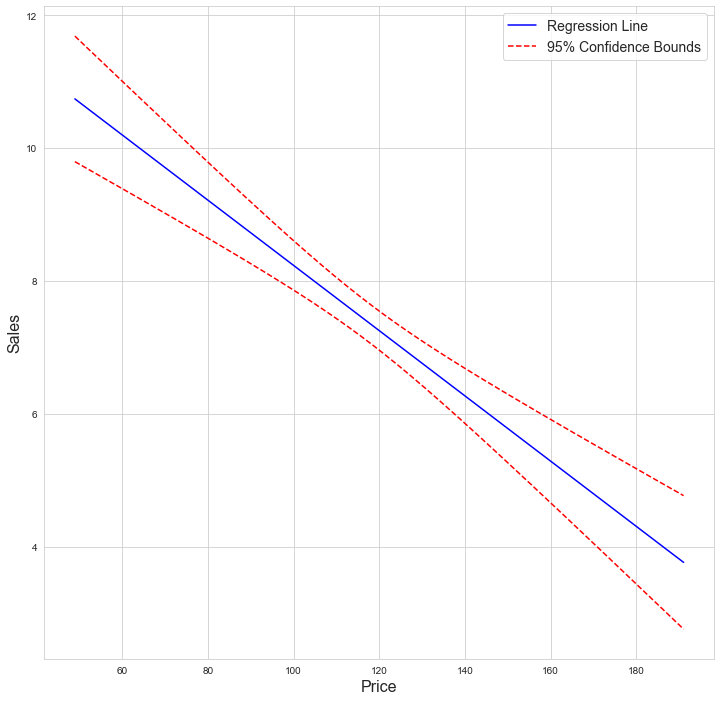

In [36]:
### Code Here
# Make the figure
plt.figure(figsize = (12,12))

# We want a wide array of rd values
xs = np.linspace(carseats_train.Price.min(),
                 carseats_train.Price.max(),
                 1000)

# Plot the regression line
plt.plot(xs, reg.predict(xs.reshape(-1,1)), 'b', label="Regression Line")

# Now we get the confidence bounds
lbs,ubs = get_ci(carseats_train.Price.values,xs,res,0.05)

# Plot the bounds
plt.plot(xs, lbs, 'r--', label="95% Confidence Bounds")
plt.plot(xs, ubs, 'r--')

# Add labels
plt.xlabel("Price", fontsize=16)
plt.ylabel("Sales", fontsize=16)

# add a legend
plt.legend(fontsize=14)

plt.show()










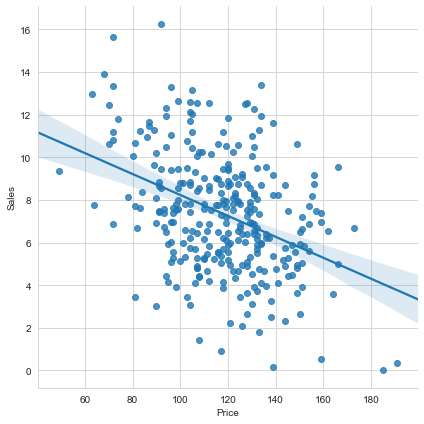

In [39]:
### Code Here




# a check with sns.


sns.lmplot(data=carseats_train, x = 'Price', y = 'Sales', height=6)
plt.show()


In [ ]:
### Code Here











In addition to confidence intervals you can produce what are known as prediction intervals which give you an idea of the uncertainty involved in predicting a value of $y$ given $X = X^*$. See the homework if you want to learn more.

## One Final Note

Let's look at our baseball regression line again.

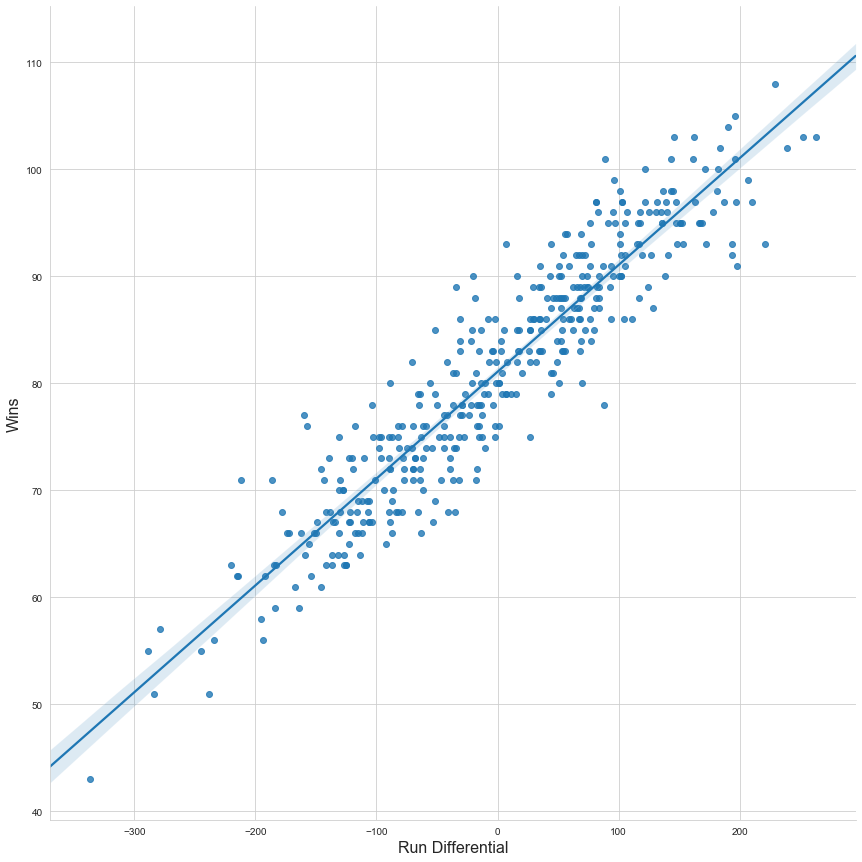

In [34]:
sns.lmplot(data = baseball_train, x = "RD", y = "W", height = 12)

plt.xlabel("Run Differential", fontsize=16)
plt.ylabel("Wins", fontsize = 16)

plt.show()

If we look, our data doesn't go much further out than a $200$ run differential.

So would it make sense to use our regression to predict the wins for a $300$ run differential or say $400$ run differential?

If we did we would be flying blind. We can only safely predict using the data we have. While the relationship between wins and run differential appears linear from our data set, we don't know if that trend will continue beyond about $250$ run differential. 

This statement holds for more techniques than just regression. If someone tries to strong arm you into making predictions that fall far outside the limits of your training data be cautious because you don't know anything out that far.

## See you in Notebook 3!

That's it for notebook 2 and for simple linear regression. In the next notebook we'll get to look at models with more than one feature!